In [1]:
include("../init-notebook.jl")

(section-diffusion-blackscholes)=
# Black–Scholes equation

Suppose that at time $t=0$ you buy a stock whose share price is $S(t)$. At a later time, if $S(t)>S(0)$, you can sell the stock and make money. But if $S(t)<S(0)$, you stand to lose money—potentially, your entire investment. You might prefer to mitigate this risk. 

One way to do so is to buy a *call option* instead of the stock. This is a contract with a fixed *strike time* $T$ and *strike price* $K$ that gives you the right to buy the stock from the contract issuer at cost $K$ at time $T$.[^european] 

[^european]: We discuss only so-called European options; American options are more difficult computationally.

Suppose $S(T)>K$. Then you could buy the stock at price $K$ and instantly resell it at price $S(T)$, so you make profit $S(T)-K$. On the other hand, if $S(T)\le K$, there is no advantage to exercising the option, because the stock is less valuable than the guaranteed purchase price. However, you have lost only what you paid for the option. These observations are summarized by the *payoff function*

:::{math}
:label: bspayoff
  H(S) = \max\{ S-K, 0 \} = (S-K)_+.
:::

```{index} Black–Scholes equation
```
What is the fair market value of the option contract? This question is answered to close approximation by the famous **Black–Scholes equation**,

:::{math}
:label: bspde
  \frac{\partial v}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 v}{\partial S^2}
  + rS \frac{\partial v}{\partial S} - r v = 0,
:::

where $r$ is the *risk-free interest rate* (i. e., what you could earn with a very safe investment), and $\sigma$ is the *volatility* of the stock (essentially, the standard deviation in the rate of return for the stock). In the Black–Scholes model, both $r$ and $\sigma$ are assumed to be known and constant. 

```{index} evolutionary PDE
```
The value $v(S,t)$ of the option depends on the time $t$ and on the stock price $S$, which may be varied independently. At the strike time, the payoff condition $v(S,T)=H(S)$ is imposed, and the goal is to solve the equation backward in time to find $v(S,0)$. Equation {eq}`bspde` is a *time-dependent partial differential equation*, or **evolutionary PDE**. 

## Initial and boundary conditions

It has independent variables $t$ and $S$, and Because of the first-order derivative in time, we require an initial value for the dependent variable. 

In order to follow the usual convention of having time flow forward instead of backward, we define a new variable $\eta=T-t$, in which case {eq}`bspde` becomes

:::{math}
:label: bspdefor
	- v_\eta + \frac{1}{2} \sigma^2 S^2 v_{SS} + rS v_S - r v  = 0,
:::

now defined for $0\le \eta \le T$. Here we have adopted the common notation of using subscripts for partial derivatives. In the new time variable we have the **initial condition**

:::{math}
  :label: bspdeIC
  v(S,0) = H(S),
:::

and the goal is to find $v(S,\eta)$ for $\eta>0$. Henceforth we will simply rename the $\eta$ variable as $t$ again, with the understanding that it runs in the opposite direction to actual time in this application.

We have not yet specified the domain of the independent variable $S$. Stock prices cannot be negative, so $S= 0$ is the left end. In principle, $S$ is not bounded from above. There are different ways to handle that fact computationally, but here we choose to truncate the domain at some positive value $S_\text{max}$. 

Because {eq}`bspde` has two derivatives in $S$, we also require a condition at each end of its domain. At $S=0$, both the stock and the option are worthless, so we impose $v=0$ there. In light of the payoff function $H$, initially the value $v$ has slope equal to one at $S=S_\text{max}$, and we choose to enforce that condition for all time. We summarize the **boundary conditions** as

:::{math}
:label: bspdeBC
\begin{split}
  v(0,t) &= 0, \\
  \frac{\partial v}{\partial S}(S_\text{max},t) &= 1.
\end{split}
:::

```{index} Dirichlet condition, Neumann condition
```

```{index} ! initial-boundary-value problem
```

At the left we have a **homogeneous Dirichlet** condition, and at the right we have a nonhomogeneous **Neumann** condition.

The complete problem consists of {eq}`bspdefor`,  {eq}`bspdeIC`, and {eq}`bspdeBC`. 
An evolutionary PDE has both initial and boundary conditions and is sometimes called an **initial-boundary-value problem** or IBVP as a result. Solving it numerically requires aspects of methods for both IVPs and BVPs.

## The heat equation

The Black–Scholes equation can be transformed by a change of variables into a simpler canonical PDE.[^notsame]

```{index} see: diffusion equation; heat equation
```

```{index} ! heat equation, ! parabolic PDE
```

::::{proof:definition} Heat equation
The **heat equation** or **diffusion equation** in one dimension is

:::{math}
:label: heat
u_t = k u_{xx},
:::

where $k$ is a constant *diffusion coefficient*.
::::

[^notsame]: The $t$ variable in the heat equation is not the same as either backward or forward time in {eq}`bspde`.

The heat equation is the archetype differential equation for the class known as **parabolic PDEs**. A diffusive process is one in which velocity is proportional to the gradient of the solution. Thus, rapid changes in the solution flatten out quickly. 

::::{proof:observation}
Solutions of the heat equation smooth out quickly and become as flat as the boundary conditions allow.
::::

(example-heateqnsolnexam)=
::::{proof:example}
Consider the following diffusion problem on 

\begin{align*}
  \text{PDE:} \quad &  u_t = u_{xx}, \quad 0 < x < 1, \; t > 0, \\[1mm]
  \text{BC:} \quad &  u(0,t) = u(1,t) = 0,\quad t \ge 0, \\[1mm]
  \text{IC:} \quad &  u(x,0) = \sin (\pi x), \quad  0 \le x \le 1.
\end{align*}

We can show that the solution is $\hat{u}(x,t) = e^{- \pi^2 t} \sin (\pi x)$ by verifying its correctness in the PDE, the initial conditions, and the boundary conditions. We start by computing the partial derivatives

\begin{align*}
  \frac{\partial \hat{u}}{\partial t} & = \left(- \pi^2 e^{- \pi^2 t} \right)\sin (\pi x), \\
  \frac{\partial^2 \hat{u}}{\partial x^2} & = e^{- \pi^2 t} \left[ - \pi^2 \sin (\pi x)\right].
\end{align*}

These are clearly equal, so the PDE is satisfied.  

Substituting either $x=0$ or $x=1$ causes $\hat{u}=0$, so the boundary conditions are satisfied. Finally, substitution of $t=0$ into $u$ does indeed recover the initial condition $\hat{u}(x,0) = \sin (\pi x)$. 
::::

In certain cases there are explicit formulas describing the solution of {eq}`heat` and hence {eq}`bspde`. These provide a lot of insight and can lead to practical solutions. But the exact solutions are fragile in the sense that minor changes to the model can make them impractical or invalid. By contrast, numerical methods are often more robust to such changes.

## A naive numerical solution

Let's return to the Black–Scholes equation {eq}`bspdefor`, rewritten here as

:::{math}
:label: bspdefor-t
  v_t = \frac{1}{2} \sigma^2 S^2 v_{SS} + rS v_S - r v,
:::

subject to the initial condition {eq}`bspdeIC` and the boundary conditions {eq}`bspdeBC`.  We now try to solve it numerically, without any transformation tricks or other insight. Define

:::{math}
:label: bsgrid
\begin{split}
  x_i &= ih, \quad h=\frac{S_\text{max}}{m}, \qquad i = 0,\ldots,m,  \\
  t_j &= j \tau, \quad \tau = \frac{T}{m}, \qquad j = 0,\ldots,n.
\end{split}
:::

Observe that we have used the more conventional $x$ and $t$ in place of $S$ and $\eta$. The result is a grid function $\mathbf{V}$ whose entries are $V_{ij} \approx v(x_i,t_j)$. By the initial condition {eq}`bspdeIC`, we set $V_{i,0} = H(x_i)$ for all $i$.

```{index} finite differences; parabolic PDE
```
For the moment, let us pretend that $i$ is unbounded in both directions. Replacing the derivatives in {eq}`bspdefor-t` with some simple finite-difference formulas, we get

:::{math}
:label: bspdeFD1
  \frac{V_{i,j+1} - V_{i,j}}{\tau} = 
  + \frac{\sigma^2 x_i^2}{2} \frac{V_{i+1,j}-2V_{i,j}+V_{i-1,j}}{h^2}
  + r x_i \frac{V_{i+1,j}- V_{i-1,j}}{2h}  - rV_{i,j}.
:::

We can rearrange {eq}`bspdeFD1` into

:::{math}
:label: bspdeFD2
  V_{i,j+1} = V_{i,j} + \frac{\lambda \sigma^2 x_i^2}{2} (V_{i+1,j}-2V_{i,j}+V_{i-1,j})
   + \frac{r x_i \mu}{2}  (V_{i+1,j}- V_{i-1,j})  - r \tau V_{i,j},
:::

where 

$$
\lambda = \frac{\tau}{h^2}, \qquad \mu = \frac{\tau}{h}. 
$$

If we put $j=0$ into {eq}`bspdeFD2`, then everything on the right-hand side is known for each value of $i$, and thus we can get values for $V_{i,1}$. We can then use $j=1$ and get all of $V_{i,2}$, and so on.


```{index} boundary conditions; numerical implementation of
```

Now we take the boundaries on $x$ into account. The value $V_{0,j+1}$ is zero, so we don't even need to compute the solution using {eq}`bspdeFD2` at $i=0$. At $i=m$, or $x_i=S_\text{max}$, things are trickier. We don't know $V_{m,j+1}$ explicitly and would like to solve for it, yet formula {eq}`bspdeFD2` refers to the fictitious value $V_{m+1,j}$ when $i=m$. This is where the Neumann condition must be applied. If the value $V_{m+1,j}$ did exist, then we could discretize that condition as

:::{math}
:label: bsneumann
  \frac{V_{m+1,j}-V_{m-1,j}}{2h} = 1.
:::

We can therefore solve {eq}`bsneumann` for the fictitious $V_{m+1,j}$ and use it where called for in the right-hand side of {eq}`bspdeFD2`. 

(demo-blackscholes-solve)=
```{proof:demo}
```
```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We consider the Black–Scholes problem for the following parameter values:

In [2]:
Smax = 8;  T = 6;
K,σ,r = 3, 0.06, 0.08;

We discretize space and time.

In [3]:
m = 200;  h = Smax / m;
x = h*(0:m)
n = 1000;  τ = T / n;
t = τ*(0:n)
λ = τ / h^2;  μ = τ / h;

We set the initial condition and then march forward in time.

In [4]:
V = zeros(m+1,n+1)
V[:,1] = @. max( 0, x-K )

for j in 1:n
    # Fictitious value from Neumann condition.
    Vfict = 2*h + V[m,j]
    Vj = [ V[:,j]; Vfict ]
    # First row is zero by the Dirichlet condition.
    for i in 2:m+1 
        diff1 = (Vj[i+1] - Vj[i-1])
        diff2 = (Vj[i+1] - 2*Vj[i] + Vj[i-1])
        V[i,j+1] = Vj[i] +
            (λ*σ^2*x[i]^2/2)*diff2 + (r*x[i]*μ)/2*diff1 - r*τ*Vj[i]
    end 
end

Here is a plot of the solution after every 250 time steps.

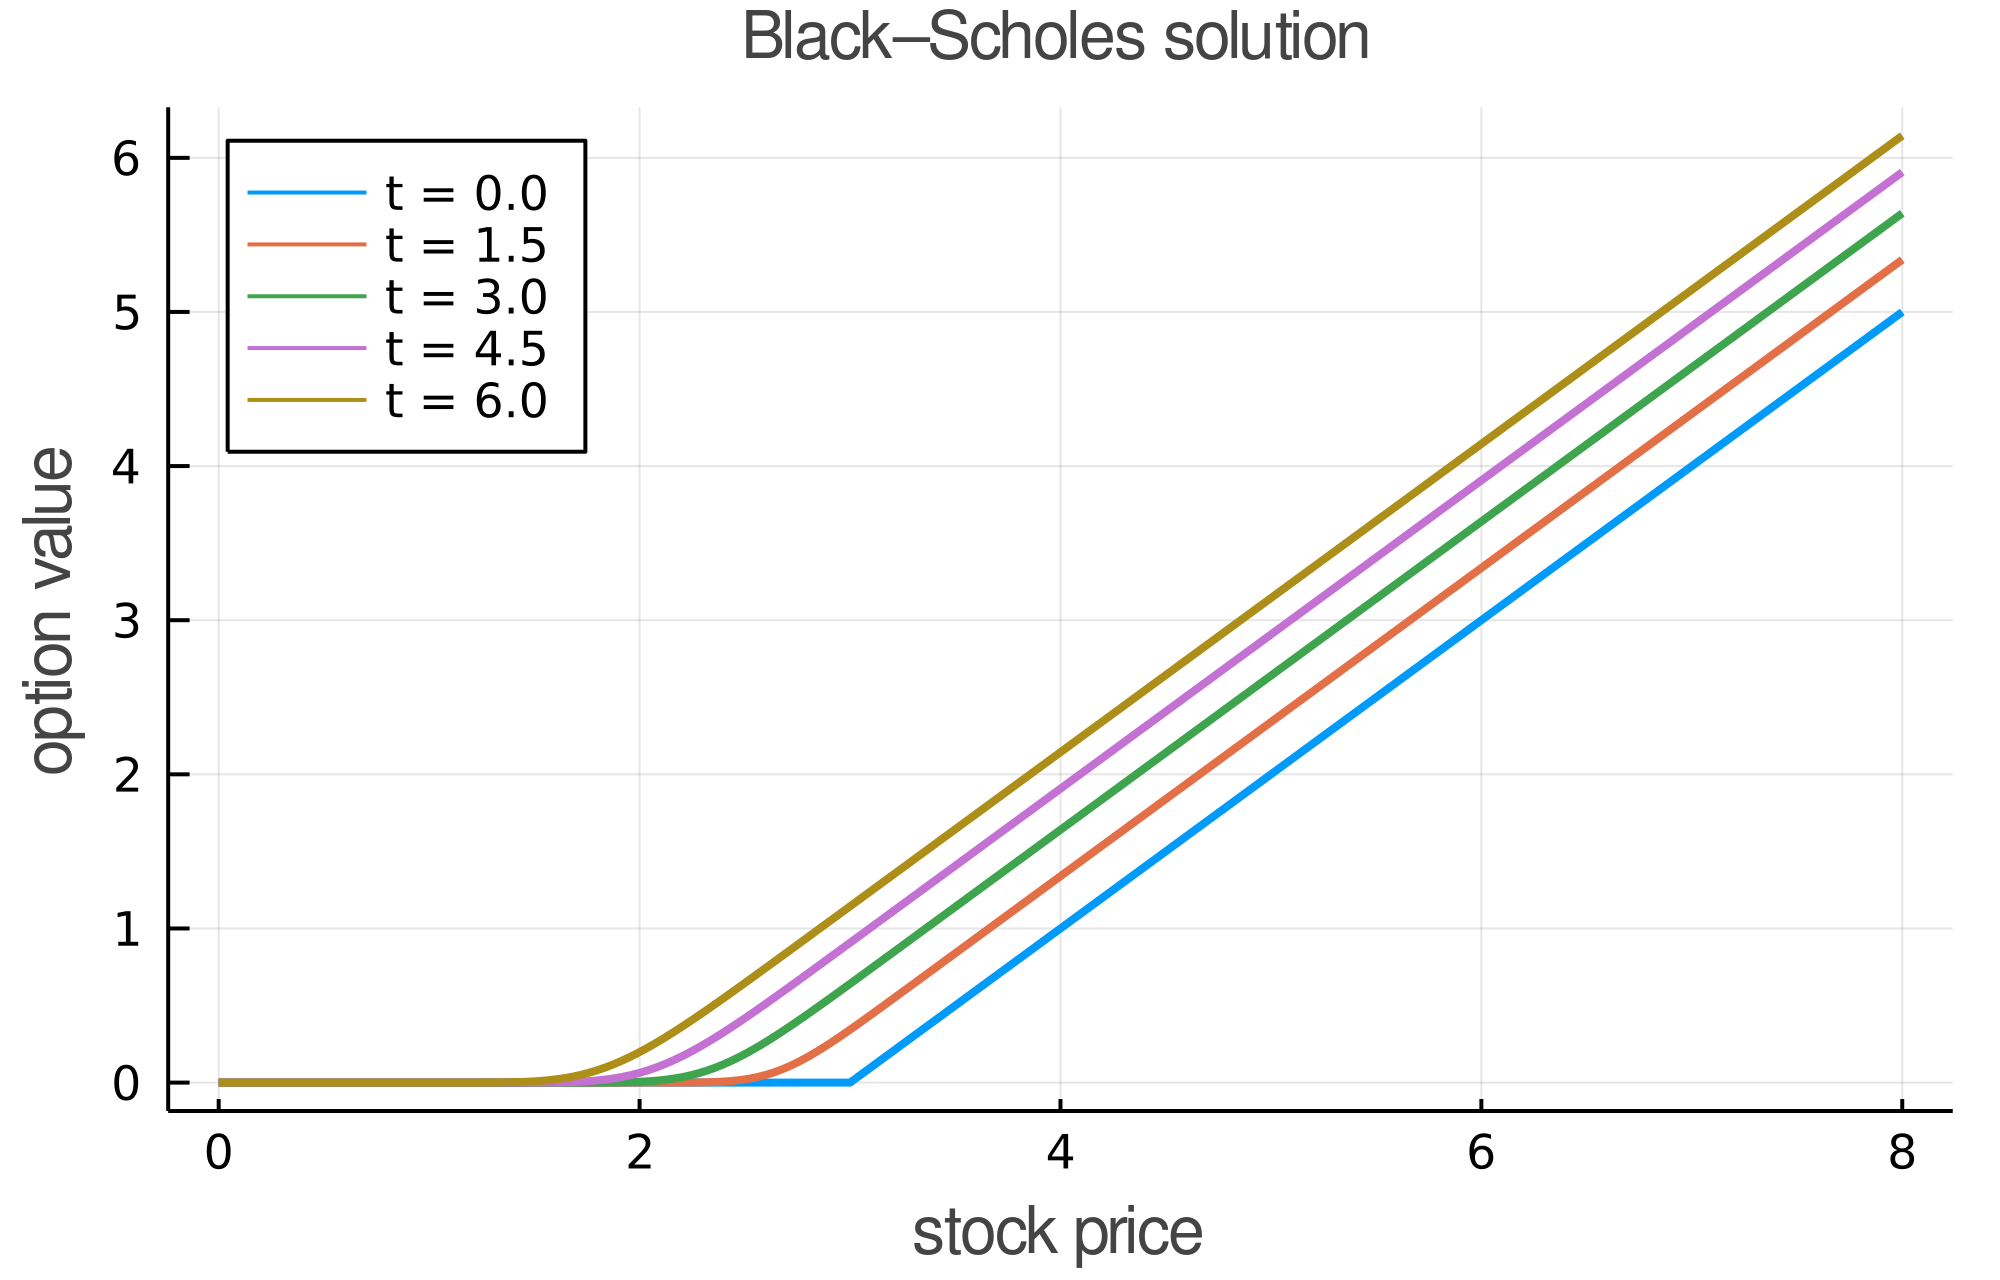

In [5]:
idx = 1:250:n+1
label = reshape( ["t = $t" for t in t[idx]], 1,length(idx))
plot(x,V[:,idx]; label,
    title="Black–Scholes solution",leg=:topleft,  
    xaxis=("stock price"),yaxis=("option value") )

```{index} ! Julia; @animate
```

Alternatively, here is an animation of the solution.

In [6]:
anim = @animate for j in 1:10:n+1
    plot(x,V[:,j],
        xaxis=(L"S"),yaxis=([0,6],L"v(S,t)"),dpi=100,    
        title=@sprintf("B–S equation, t = %.2f",t[j]) )
end
mp4(anim,"black-scholes-6.mp4")

Plots.AnimatedGif("/Users/driscoll/repos/fnc-julia/diffusion/black-scholes-6.mp4")

The results are easy to interpret, recalling that the time variable really means *time until strike*. Say you are close to the option's strike time. If the current stock price is, say, $S=2$, then it's not likely that the stock will end up over the strike price $K=3$, and therefore the option has little value. On the other hand, if presently $S=3$, then there are good odds that the option will be exercised at the strike time, and you will need to pay a substantial portion of the stock price in order to take advantage. As the time to strike increases, there is an expectation that the stock price is more likely to rise somewhat, making the value of the option larger at each fixed $S$. 
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

Everything in {numref}`Demo {number} <demo-blackscholes-solve>` seems to go smoothly. However, trouble lurks just around the corner.


(demo-blackscholes-unstable)=

```{proof:demo}
```
```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Let's try to do everything the same as in {numref}`Demo {number} <demo-blackscholes-solve>`, but extending the simulation time to $T=8$.

In [7]:
T = 8;

m = 200;  h = Smax / m;
x = h*(0:m)
n = 1000;  τ = T / n;
t = τ*(0:n)
λ = τ / h^2;  μ = τ / h;

for j in 1:n
    # Fictitious value from Neumann condition.
    Vfict = 2h + V[m,j]
    Vj = [ V[:,j]; Vfict ]
    # First row is zero by the Dirichlet condition.
    for i in 2:m+1 
        diff1 = (Vj[i+1] - Vj[i-1])
        diff2 = (Vj[i+1] - 2Vj[i] + Vj[i-1])
        V[i,j+1] = Vj[i] +
            (λ*σ^2*x[i]^2/2)*diff2 + (r*x[i]*μ)/2*diff1 - r*τ*Vj[i]
    end   
end

anim = @animate for j in 1:10:n+1 
    plot(x,V[:,j],
        xaxis=(L"S"),yaxis=([0,6],L"v(S,t)"),dpi=100,    
        title=@sprintf("t = %.2f",t[j]) )
end
mp4(anim,"black-scholes-8.mp4")

Plots.AnimatedGif("/Users/driscoll/repos/fnc-julia/diffusion/black-scholes-8.mp4")

This so-called solution is nonsense!
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

The explosive growth of error in {numref}`Demo {number} <demo-blackscholes-unstable>` suggests that there is instability at work. Understanding the source of that instability comes later in this chapter. First, though, we consider a general and robust strategy for solving evolutionary PDEs.

## Exercises

1. ✍ Show that $u(x,t) = e^{-4 \pi^2 t} \cos (2 \pi x) $ is a solution to the
IBVP

    \begin{align*}
      \text{PDE:} \quad & \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2},\quad 0<x<1,\; t > 0, \\
      \text{BC:} \quad &  \frac{\partial u}{\partial x}(0,t) = \frac{\partial u}{\partial x}(1,t) = 0,\quad t > 0, \\
      \text{IC:} \quad & u(x,0) = \cos (2 \pi x),\quad 0 \le x \le 1.
    \end{align*}

2. ✍ Show that $u(x,t) = t^{-1/2} \exp(-x^2/4t)$ solves the heat equation {eq}`heat` at any value of $t>0$.

3. ✍ Equation {eq}`bspdeFD1` results from applying finite differences to the derivatives in {eq}`bspdefor-t`, including a forward difference for the term $v_t$. 

    **(a)** Write out the method that results if a backward difference is used for $v_t$ instead.
    
    **(b)** Explain why modifying the code from {numref}`Demo %s <demo-blackscholes-solve>` to implement this formula requires the use of matrix algebra.

4. ⌨ In this problem you are asked to revisit {numref}`Demo %s <demo-blackscholes-solve>` in order to examine the instability phenomenon more closely.
  
    **(a)** Leaving other parameters alone, let $m=100$. To the nearest ten, find the minimum value of $n$ that leads to a stable (i. e., not exponentially growing) solution.

    **(b)** Repeat (a) for $m=120,140,\ldots,200$. Make a table of the minimum stable $n$ for each $m$. Is the relationship $n=O(m)$, or something else?